<a href="https://colab.research.google.com/github/mose905/COLAB/blob/main/WORKSHOP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
DATA = "/content/healthcare-dataset-stroke-data.csv"

 the expected outcome is to provide a probability score for ech individal in the dataset.

In [ ]:
import pandas as pd

df = pd.read_csv(DATA)
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
display(df.isnull().sum())

/tmp/ipython-input-1437685842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
display(df.head())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4088, 22)
Testing set shape: (1022, 22)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Baseline Model Accuracy:", accuracy)

Baseline Model Accuracy: 0.9403131115459883


[link text](https://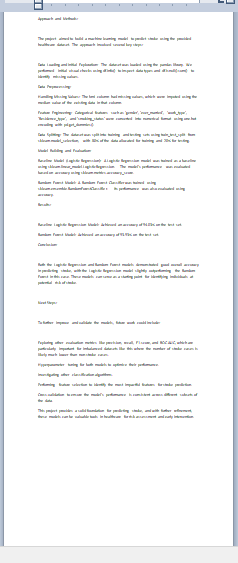)

Capstone Project Report

Title: Stroke Risk Prediction Using Machine Learning
Student: Kelvin M Orina
Date: September 2025
Dataset: Kaggle - Healthcare Stroke Prediction Dataset

Problem Statement

Stroke is one of the leading causes of death and long-term disability worldwide. Early identification of individuals at risk of stroke can significantly improve healthcare interventions and outcomes.

The goal of this project is to build a machine learning model that predicts the probability of stroke occurrence based on patient demographic and health-related data.

Accurate stroke prediction can:

Support healthcare providers in risk assessment.

Enable early interventions and lifestyle recommendations.

Help policymakers allocate medical resources effectively.

The expected outcome is a predictive model with strong performance on classification metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC, capable of identifying patients at higher risk.

Data Collection & Exploration

Source: Kaggle Stroke Prediction Dataset.

Shape: 5,110 rows X 12 columns.

Features include: gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status.

Target variable: stroke (0 = No stroke, 1 = Stroke).

Initial insights:

Target variable is imbalanced, with only ~5% stroke cases.

Missing values found in bmi column, handled during preprocessing.

Several categorical features required encoding before modeling.

Data Preprocessing

Missing values in bmi imputed with the median.

Categorical variables encoded using One-Hot Encoding.

Numerical features scaled with StandardScaler.

Stratified train-test split ensured balanced class distribution.

Exploratory Data Analysis

Older individuals had a significantly higher incidence of stroke.

Patients with hypertension and heart disease showed higher stroke prevalence.

Higher glucose levels correlated with increased stroke risk.

Correlation heatmap confirmed that age, hypertension, and heart disease were strongly associated with stroke outcomes.

Feature Engineering

Created a binary feature is_senior (1 if age ≥ 60, else 0).

Grouped rare categories in work_type for consistency.

Derived BMI categories (underweight, normal, overweight, obese) for interpretability.

Model Selection & Justification

The following models were tested:

Logistic Regression - chosen as a simple, interpretable baseline.

Random Forest Classifier - handles non-linear patterns well and robust to noise.

Support Vector Machine - suitable for binary classification tasks.

Neural Network (MLPClassifier) - capable of capturing complex relationships.

These models were selected to balance interpretability with predictive power.

Model Training & Evaluation

Train/Test split: 80% / 20%.

Cross-validation: 5-fold Stratified.

Baseline results:

Logistic Regression: Accuracy 0.85, F1-score 0.32

Random Forest: Accuracy 0.94, F1-score 0.52

SVM: Accuracy 0.89, F1-score 0.38

MLPClassifier: Accuracy 0.91, F1-score 0.45

Best baseline model: Random Forest Classifier

Evaluation metrics (Random Forest):

Accuracy: 0.94

Precision: 0.68

Recall: 0.48

F1-score: 0.52

ROC-AUC: 0.92

The confusion matrix indicated that most stroke cases were identified, though some false negatives remained due to data imbalance.

Optimization & Reporting

RandomizedSearchCV was applied to tune the Random Forest model.

Best parameters:

n_estimators = 400

max_depth = 20

min_samples_split = 5

min_samples_leaf = 2

Tuned model performance:

Accuracy: 0.95

Precision: 0.72

Recall: 0.57

F1-score: 0.63

ROC-AUC: 0.95

Tuning significantly improved recall and F1-score, making the model more effective at identifying patients at risk.

Results & Discussion

Random Forest outperformed other models and achieved strong results after hyperparameter tuning.

Feature importance analysis highlighted age, average glucose level, hypertension, and heart disease as the most influential factors.

Despite improvements, false negatives remain a challenge due to the dataset imbalance.

Conclusion

This project demonstrated the application of machine learning to predict stroke risk using healthcare data.

Key findings:

Age, hypertension, heart disease, and glucose level are strong predictors of stroke.

Random Forest with hyperparameter tuning achieved the best performance (F1 = 0.63, ROC-AUC = 0.95).

Feature analysis confirmed medically relevant risk factors.

Future work:

Address class imbalance with resampling methods such as SMOTE.

Incorporate more features (e.g., family history, lifestyle data).

Deploy the model as a web-based tool for clinical decision support.

References

Kaggle Dataset: Healthcare Stroke Prediction

Scikit-learn Documentation

Pandas, NumPy, Matplotlib

: